In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

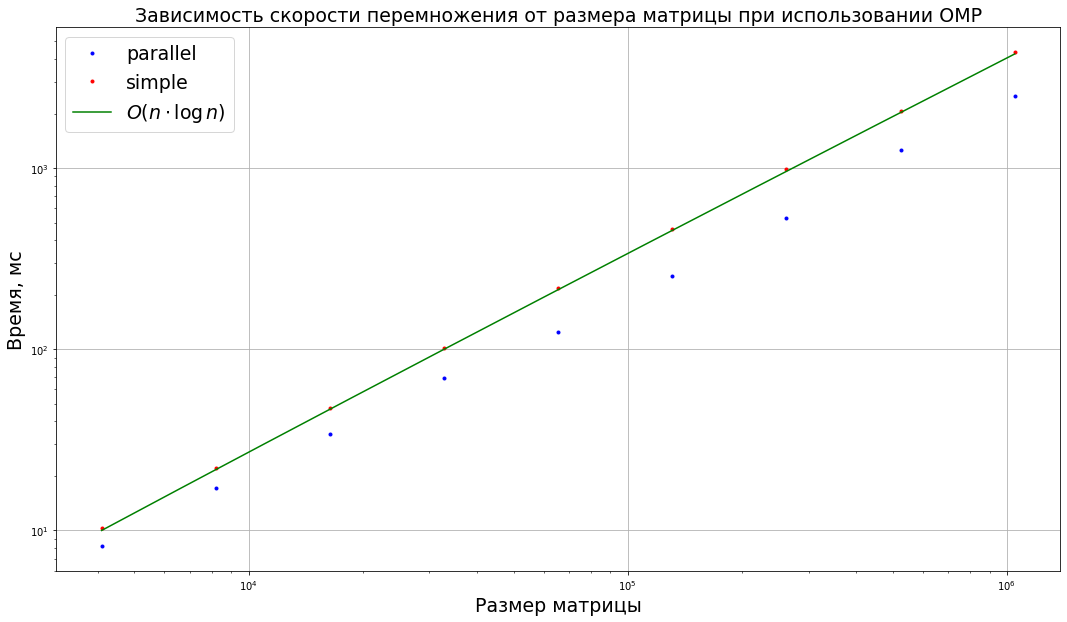

Оценочная асимптотика алгоритма параллельного n^1.0237236191062367
Оценочная асимптотика алгоритма последовательного n^1.091930988207057


In [12]:
par_file = Path("data_par.txt")
simp_file = Path("data_simp.txt")

par = np.genfromtxt(par_file, delimiter=",").transpose()
simp = np.genfromtxt(simp_file, delimiter=",").transpose()
szs = np.arange(np.min(par[0]), np.max(par[0]), 1)

nlogs = szs * np.log(szs)
nlogs /= nlogs[0] / 10

def get_lstsq_coeffs(x, y):
    return np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond=None)[0]


def get_log_coeffs(x, y):
    return get_lstsq_coeffs(np.log10(x), np.log10(y))


a, b = get_log_coeffs(par[0], par[1])
sa, sb = get_log_coeffs(simp[0], simp[1])

plt.figure(figsize=(18, 10))
plt.loglog(par[0], par[1], "b.", label="parallel")
plt.loglog(simp[0], simp[1], "r.", label="simple")
plt.loglog(szs, nlogs, "g-", label="$O\\left( n \\cdot \\log{n} \\right)$")

plt.grid()
plt.xlabel("Размер матрицы", fontsize=19)
plt.ylabel("Время, мс", fontsize=19)
plt.title(
    "Зависимость скорости перемножения от размера матрицы при использовании OMP",
    fontsize=19,
)
plt.legend(fontsize=19)
plt.show()

print(f"Оценочная асимптотика алгоритма параллельного n^{a}")
print(f"Оценочная асимптотика алгоритма последовательного n^{sa}")


